## Overview

This dataset captures a multifaceted view of student life and academic outcomes, comprising 6,607 records. Each row represents an individual student, with features spanning academic habits, personal circumstances, and socio-economic background. The primary objective is to understand the factors that influence exam scores and build predictive models to estimate future performance.

## Feature Landscape

- **Academic Behavior:**
Hours Studied, Attendance, Previous Scores, Tutoring Sessions, Teacher Quality
- **Personal Well-being:**
Sleep Hours, Motivation Level, Physical Activity, Learning Disabilities
- **Socio-Economic Factors:**
Parental Involvement, Family Income, Parental Education Level, Internet Access, Access to Resources
- **Environmental & Demographic Influences:**
Peer Influence, School Type, Distance from Home, Gender, Extracurricular Activities




## What does this Analysis aims to?

**Understand the Features**: how the hours studied, attendance, and teacher quality impacts on exam scores


**Rank Features**: identify the most feature predict the exam score

**Handling the outliers**: students who have high or low scores which is special cases

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [85]:
url = r"StudentPerformanceFactors.csv"

In [86]:
## Loading the dataset
df = pd.read_csv(url)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Numerical Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


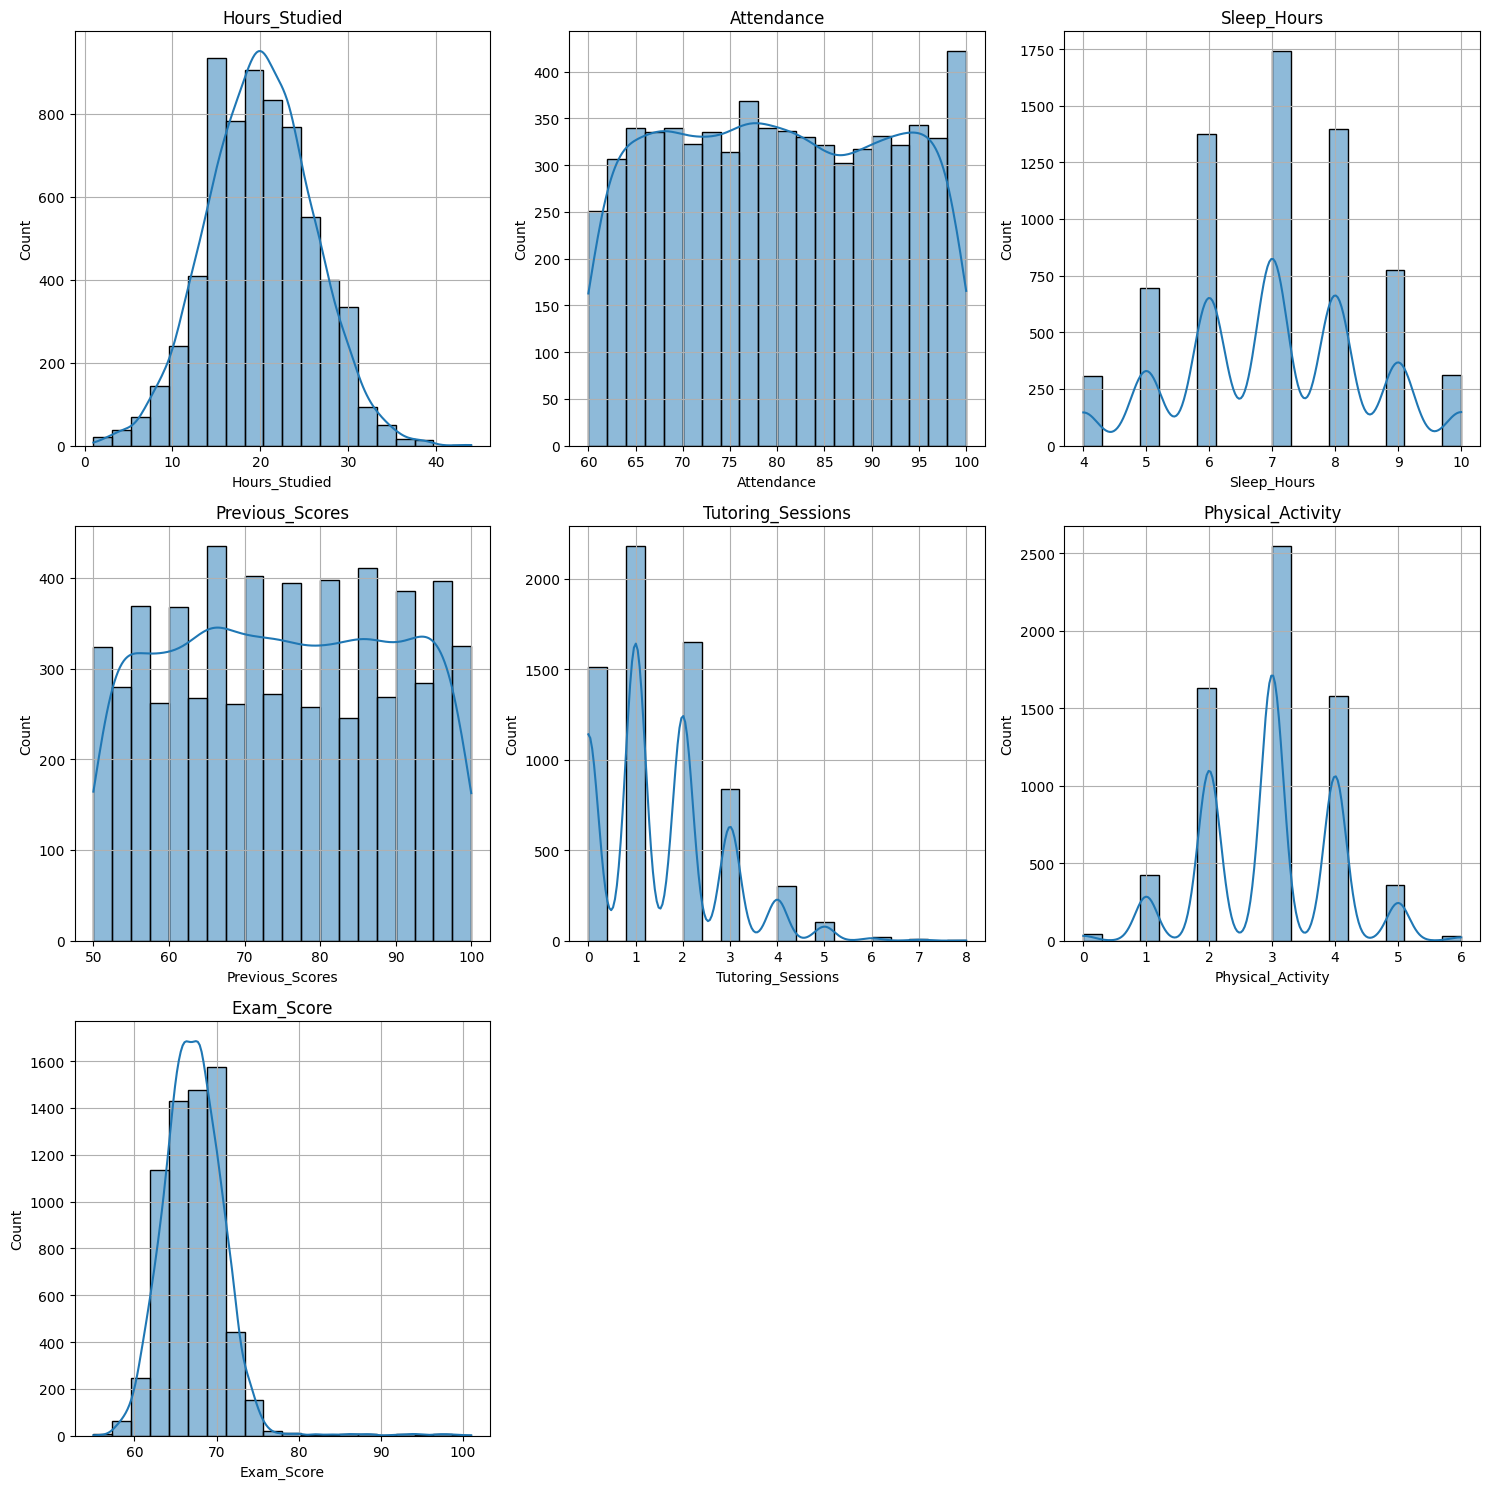

In [32]:
numeric_col = df.select_dtypes(include = 'number').columns.tolist()
plt.figure(figsize=(15, 15))
for i, n_col in enumerate(numeric_col, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[n_col], bins = 20, kde = True)
    plt.title(n_col)
    plt.grid(True)
plt.tight_layout()
plt.show()

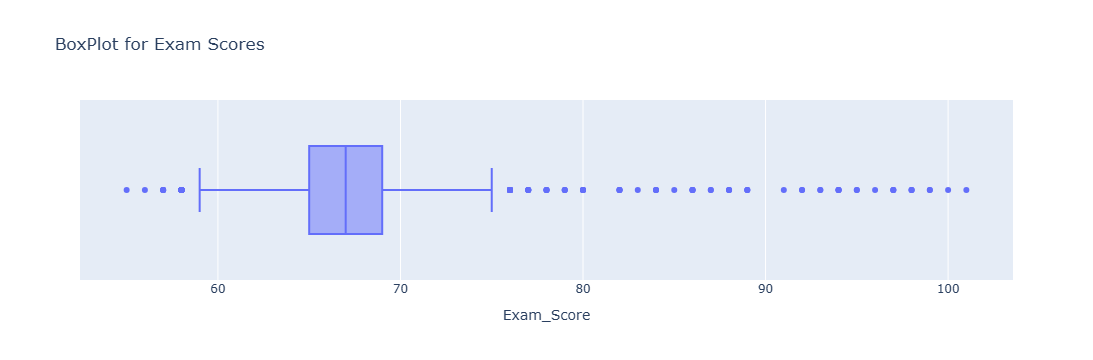

In [19]:
fig = px.box(df, x = 'Exam_Score', title = 'BoxPlot for Exam Scores')
fig.show()

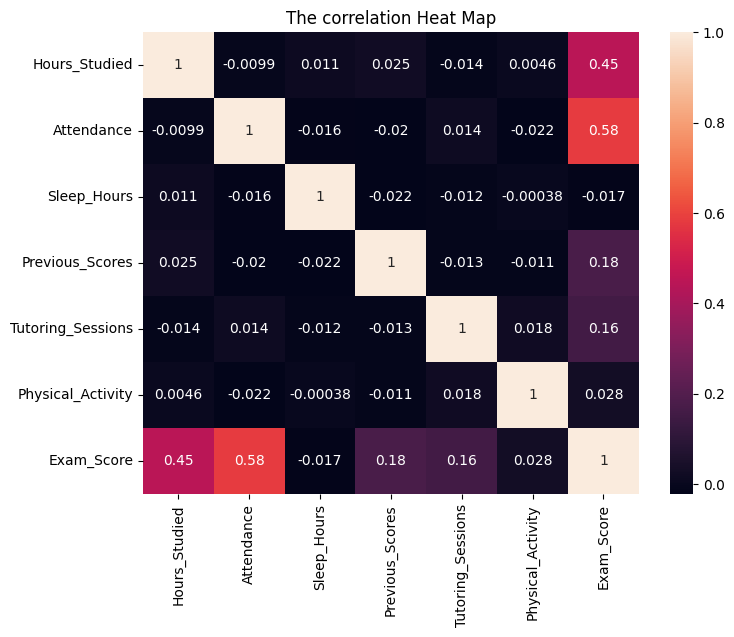

In [15]:
## Heat map
corr = df[numeric_col].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True)
plt.title('The correlation Heat Map')
plt.show()

## Categorical Analysis

In [9]:
cat_col = df.select_dtypes(include = 'object').columns.tolist()
cat_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

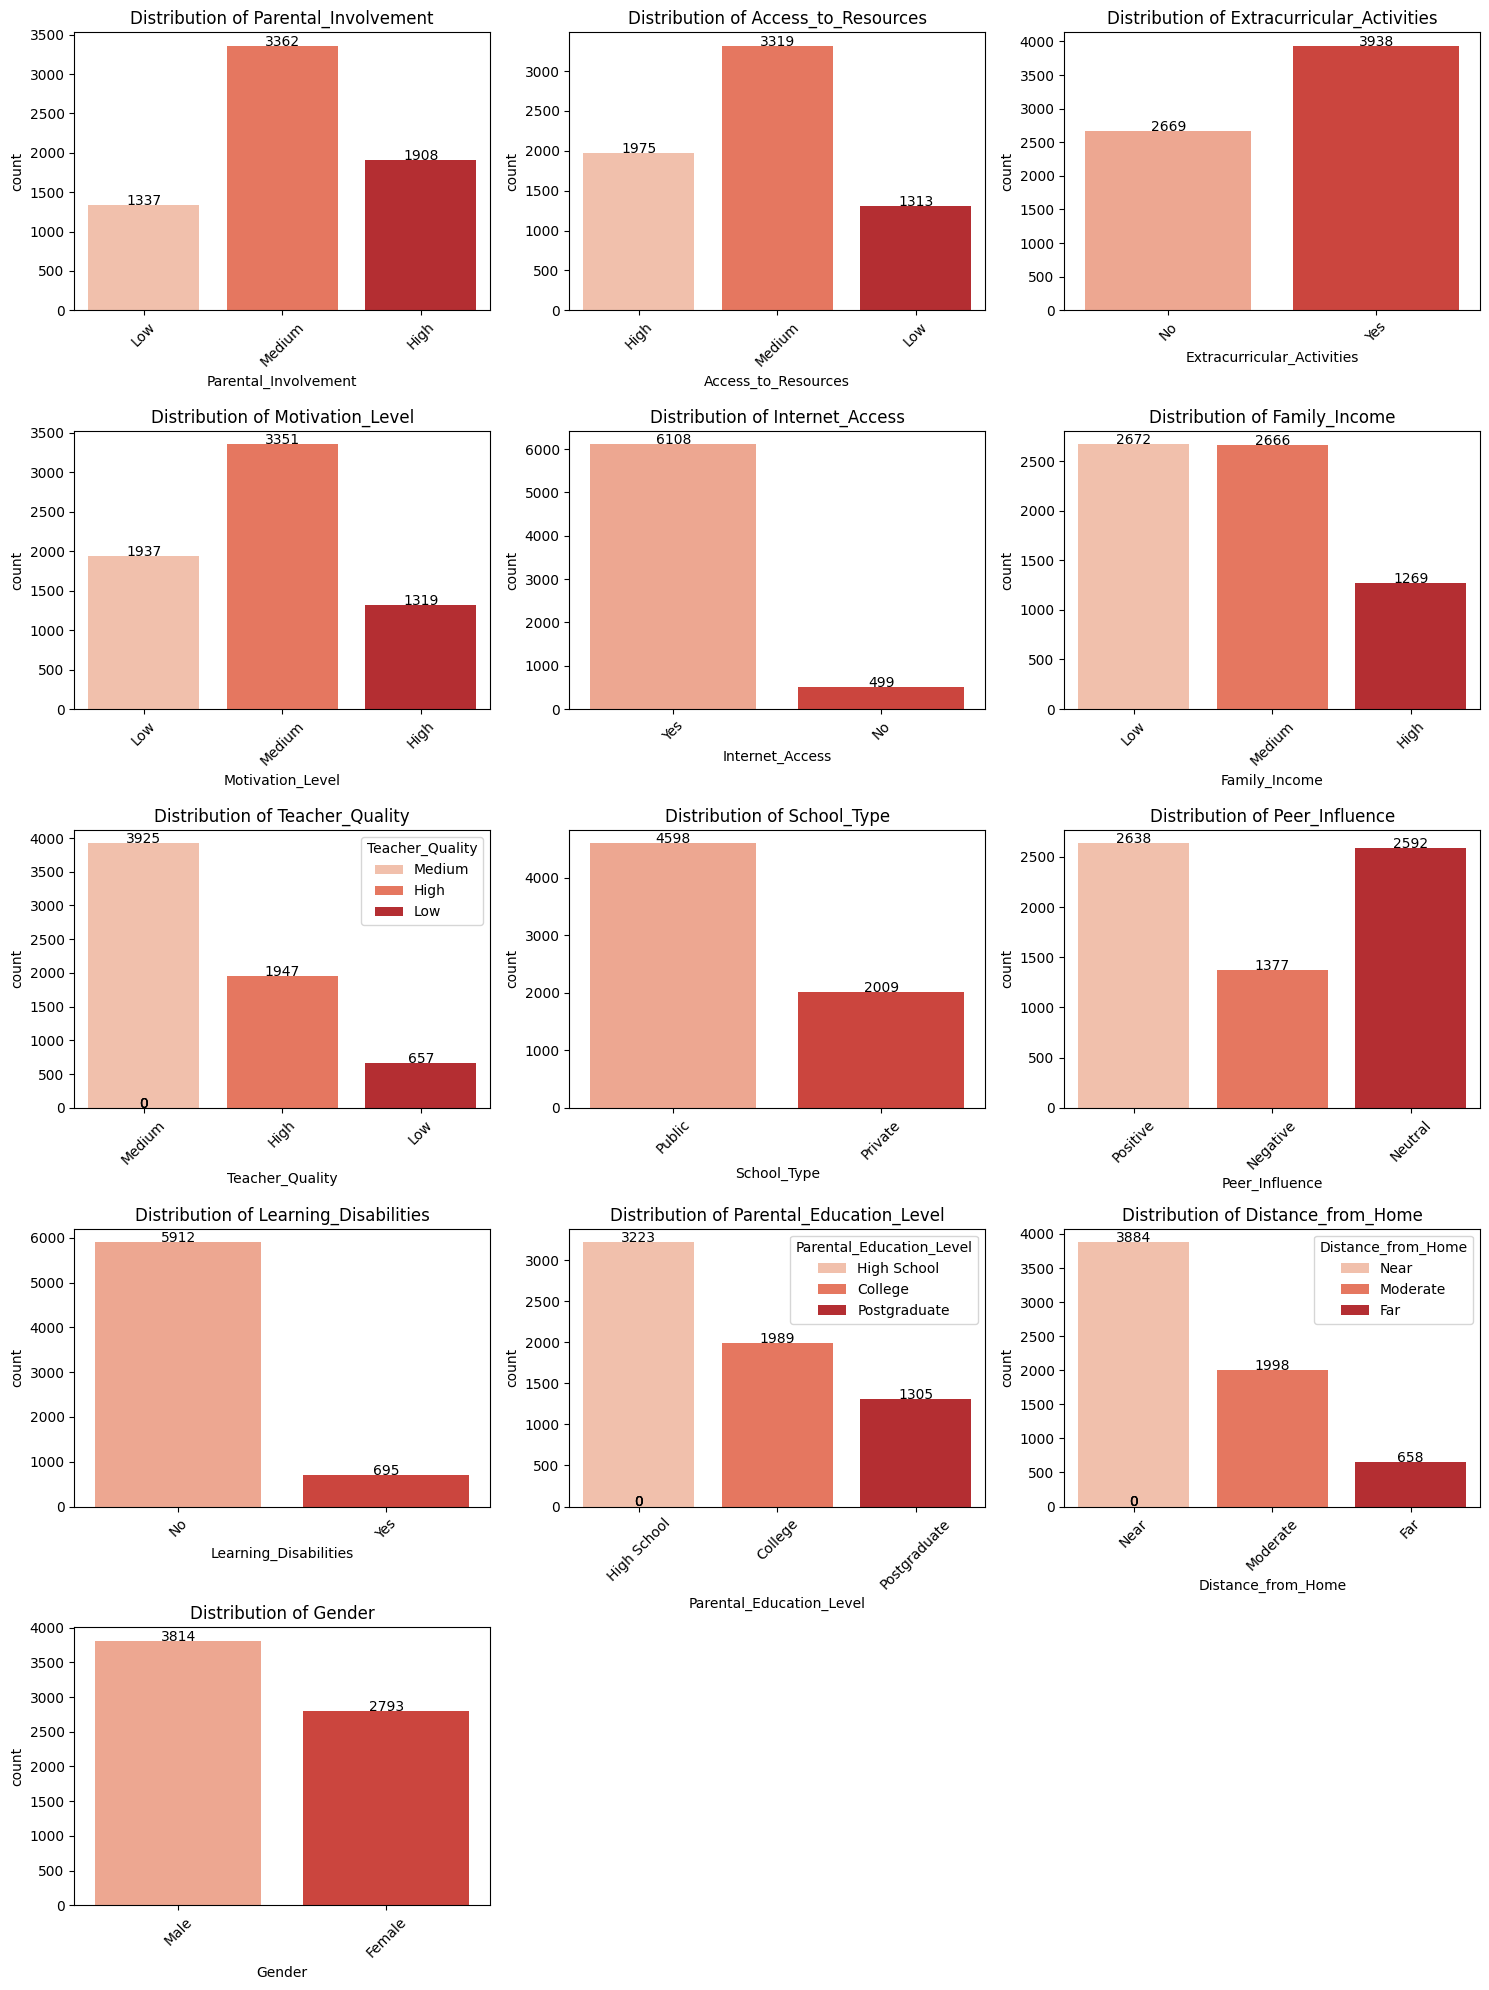

In [30]:
plt.figure(figsize = (15,20))
for i, c in enumerate(cat_col, 1):
    plt.subplot(5,3,i)
    ax = sns.countplot(x = c, data = df, hue = c, palette = 'Reds')
    plt.title(f'Distribution of {c}')
    plt.xticks(rotation = 45)
    for t in ax.patches:
        height = t.get_height()
        ax.text(t.get_x() + t.get_width()/2, height+0.5, int(height), ha = 'center')
plt.tight_layout()
plt.show()

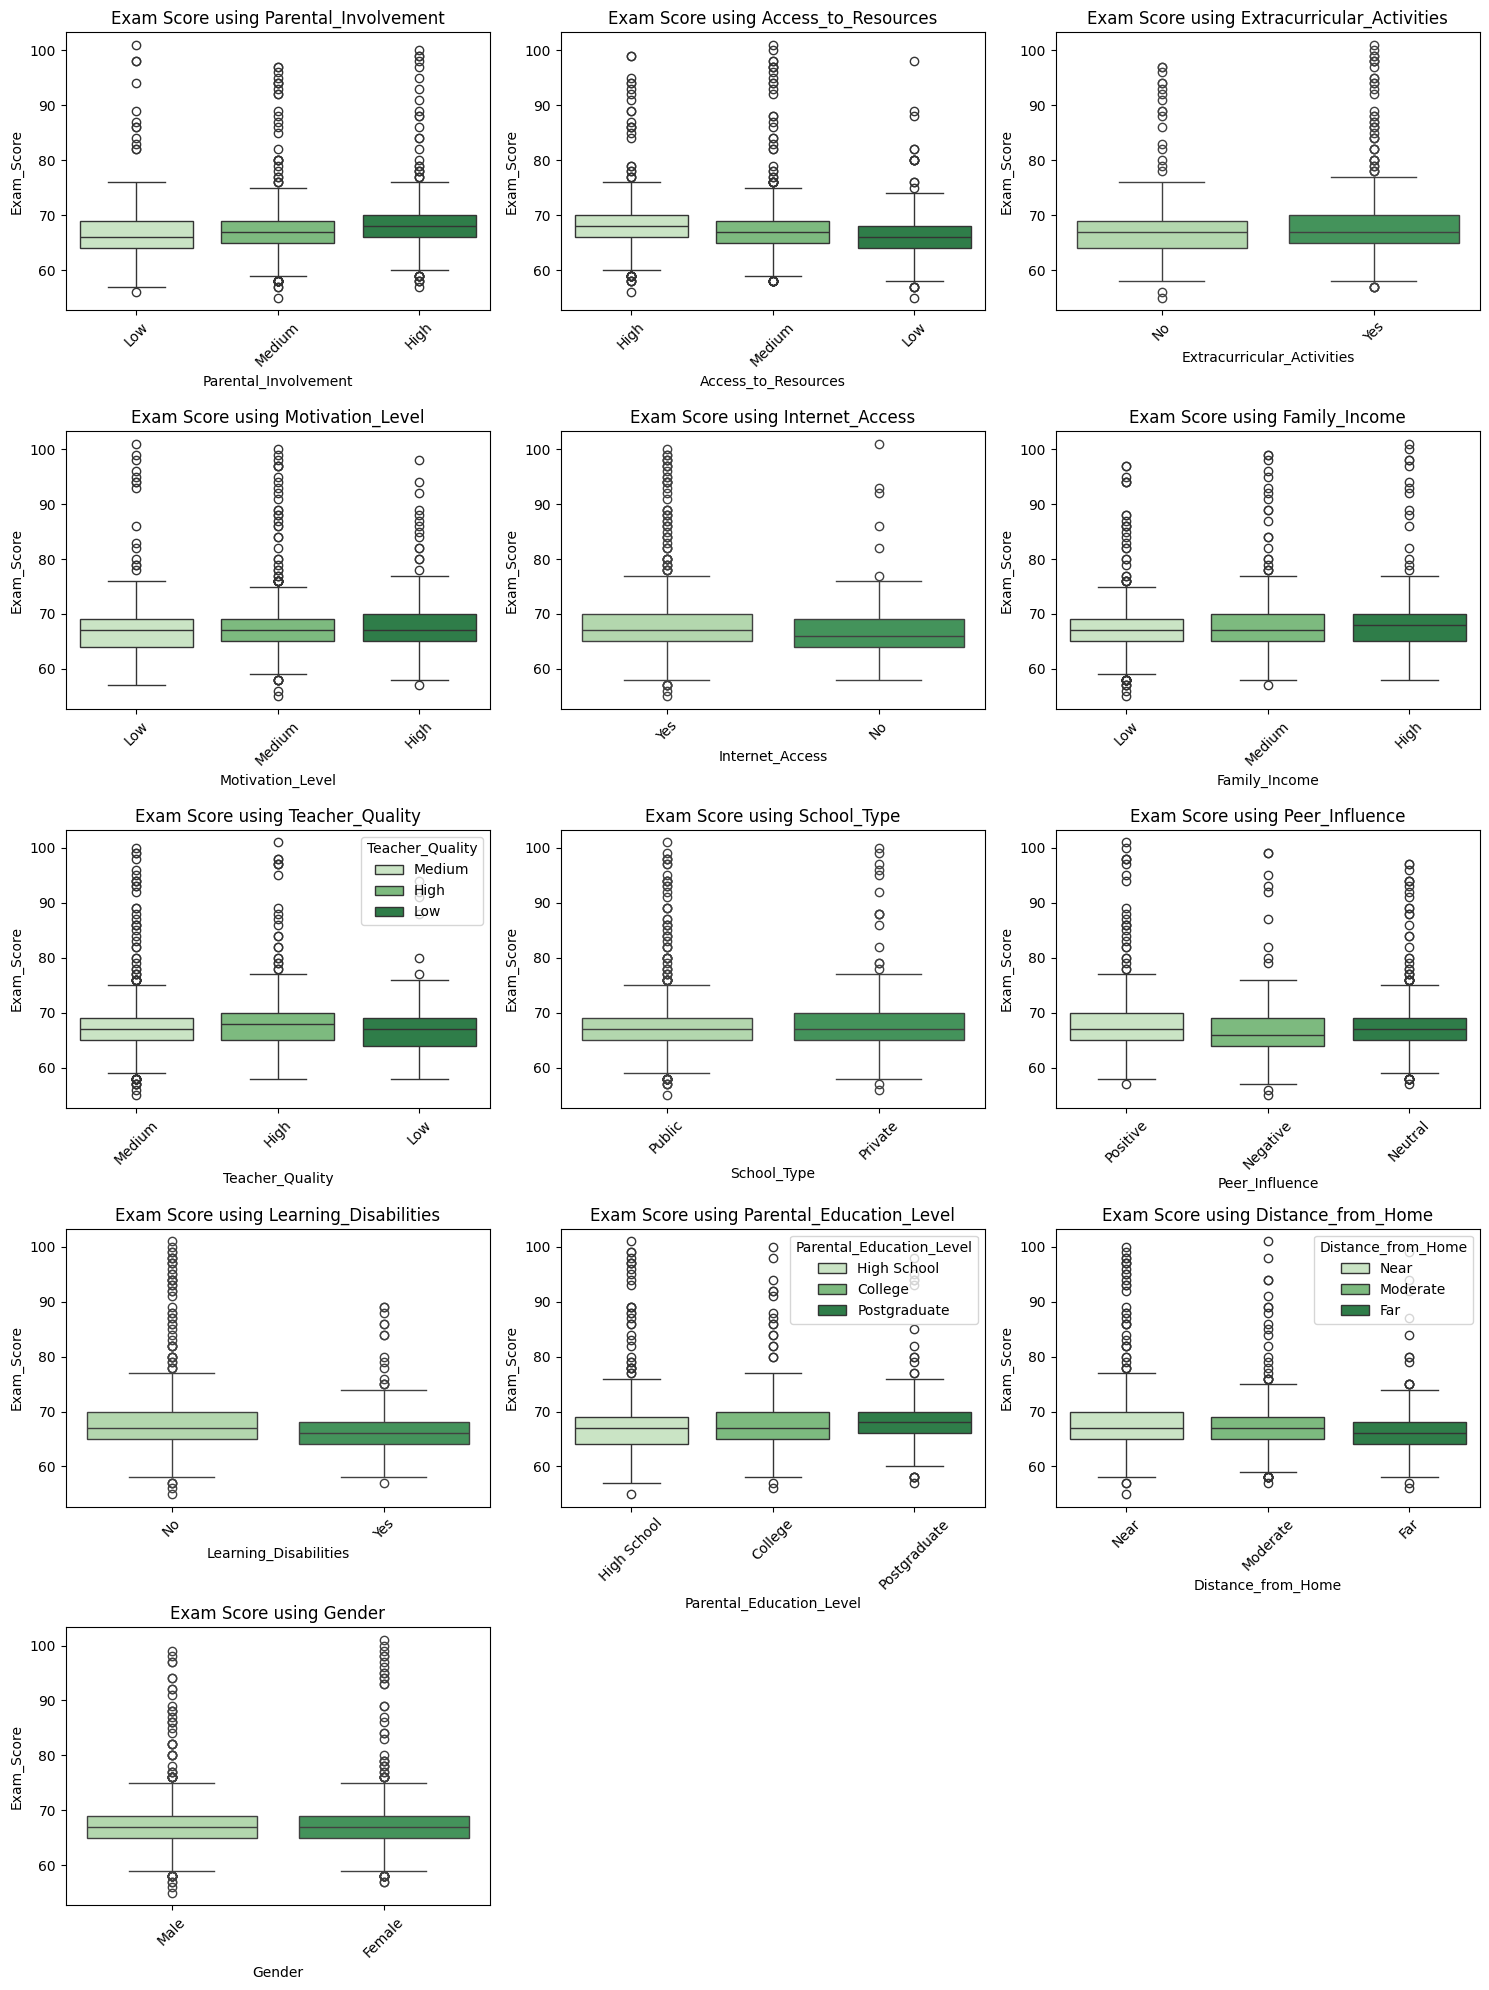

In [38]:
plt.figure(figsize = (15,20))
for i, c in enumerate(cat_col, 1):
    plt.subplot(5,3,i)
    sns.boxplot(x = c, y = 'Exam_Score', data = df, palette = 'Greens', hue = c)
    plt.title(f'Exam Score using {c}')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

## Preprocessing

In [39]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [40]:
## Delete the missing values
df.dropna(inplace = True)

In [41]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

In [47]:
Numeric_Data = df[numeric_col]

## Calculate z-score
z = np.abs((Numeric_Data - Numeric_Data.mean()) / Numeric_Data.std())

## Delete the outliers
df_cleaned = df[(z < 3).all(axis = 1)]

print(f'Before deletting outliers: {df.shape[0]}')
print(f'After deletting outliers: {df_cleaned.shape[0]}')

Before deletting outliers: 6378
After deletting outliers: 6280


In [50]:
from sklearn.preprocessing import LabelEncoder

## Encoding the data
label_Encode = LabelEncoder()
for col in cat_col:
    df[col] = label_Encode.fit_transform(df[col])
    
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


## Modelling

In [52]:
## Splitting the data
x = df.drop(['Exam_Score'], axis = 1) 
y = df['Exam_Score']

x.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0


In [53]:
y.head(10)

0    67
1    61
2    74
3    71
4    70
5    71
6    67
7    66
8    69
9    72
Name: Exam_Score, dtype: int64

In [56]:
from sklearn.preprocessing import RobustScaler

## Scalling the data
scaler = RobustScaler()
Robust_Scaled = scaler.fit_transform(x)
Robust_Scaled_df = pd.DataFrame(Robust_Scaled, columns = x.columns)

Robust_Scaled_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.375,0.20,-0.5,-1.0,-1.0,0.0,-0.08,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.125,-0.80,-0.5,0.0,-1.0,0.5,-0.64,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.5,0.0,-1.0,-1.0,-1.0
2,0.500,0.90,0.0,0.0,0.0,0.0,0.64,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0
3,1.125,0.45,-0.5,0.0,0.0,0.5,0.92,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.5,0.0,0.0,-1.0,0.0
4,-0.125,0.60,0.0,0.0,0.0,-0.5,-0.40,0.0,0.0,2.0,1.0,-1.0,0.0,0.0,0.5,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,0.625,-0.55,-1.0,0.0,-1.0,0.0,0.04,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,-0.5,0.0,0.0,0.0,-1.0
6374,0.375,-0.20,-1.0,0.0,-1.0,0.5,0.24,0.0,0.0,2.0,0.0,-1.0,0.0,1.0,-0.5,0.0,0.0,0.0,-1.0
6375,0.000,0.50,0.0,-0.5,0.0,-0.5,-0.40,-1.0,0.0,2.0,0.0,0.0,0.0,-1.0,-0.5,0.0,1.0,0.0,-1.0
6376,-1.250,0.30,-1.0,-1.0,0.0,-0.5,0.64,-2.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-2.0,-1.0


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(Robust_Scaled_df, y, test_size = 0.2, random_state = 42)

## Train the model
model = LinearRegression()
model.fit(x_train, y_train)

## Prediction
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
2718,1.375,0.80,-1.0,-1.0,0.0,1.0,-0.40,-2.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-0.5,0.0,0.0,-2.0,0.0
4275,-0.875,0.20,0.0,0.0,0.0,1.0,0.76,0.0,0.0,2.0,1.0,0.0,0.0,-1.0,-0.5,1.0,0.0,0.0,0.0
4141,0.875,0.15,0.0,0.0,0.0,1.0,0.04,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
1199,0.000,0.85,-1.0,0.0,0.0,0.0,0.76,-2.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0
4546,-0.375,-0.20,0.0,-1.0,0.0,0.5,0.80,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.5,0.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,0.875,-0.20,-1.0,-1.0,0.0,1.0,-0.80,0.0,0.0,2.0,0.0,0.0,-1.0,0.0,-1.5,0.0,0.0,-1.0,-1.0
5294,0.500,-0.85,0.0,0.0,0.0,0.5,0.40,-2.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-2.0,-1.0
4905,0.000,0.05,-0.5,0.0,0.0,-0.5,-0.56,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.0,-1.0
6278,-1.000,0.60,-0.5,-0.5,0.0,0.0,0.12,-2.0,0.0,2.0,1.0,-1.0,0.0,-1.0,-0.5,0.0,-1.0,0.0,0.0


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score          : {test_r2:.2f}')

Mean Squared Error: 5.22
R² Score          : 0.66


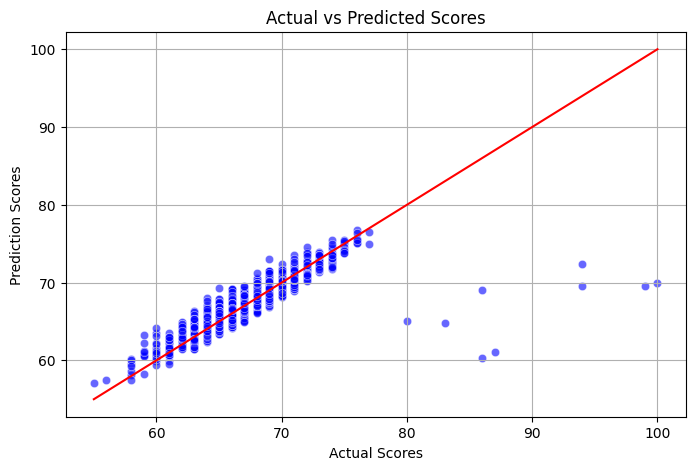

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = y_test,y =  y_pred_test, color='blue', alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Prediction Scores')
plt.grid(True)
plt.show()